In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import xarray as xr

from shapely.geometry import Point, MultiPoint

from agrifoodpy_data.land.utils import raster_gdf
from agrifoodpy.land.land import LandDataArray

# Local Authority Districts (May 2025) Boundaries UK BUC

Dataset is available here:
https://geoportal.statistics.gov.uk/maps/729ef47ece1d486c883248d71bc3921f

Here we rasterise the boundaries dataset and generate a segment map aligned to
the british national grid

In [2]:
bdry_file = "LAD_MAY_2025_UK_BUC_-5632134743780886779.gpkg"

# Spatial resolution of the raster map to be generated, in meters
res = 1000

In [3]:
bdry = gpd.read_file(bdry_file)
bdry.head()

,LAD25CD,LAD25NM,LAD25NMW,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
0,E06000001,Hartlepool,,447161.0,531473.0,-1.270174,54.676132,{C963A7ED-3911-408A-92C9-4889623C4958},"MULTIPOLYGON (((447097.001 537152.001, 444844...."
1,E06000002,Middlesbrough,,451141.0,516887.0,-1.210998,54.544679,{65836B82-125C-46DE-A93D-4496468D011F},"MULTIPOLYGON (((450791.102 520932.504, 448453 ..."
2,E06000003,Redcar and Cleveland,,464330.0,519596.0,-1.006565,54.567520,{E42E9FAE-EC75-4262-A265-2371A51DBB91},"MULTIPOLYGON (((478227.402 518780.419, 478133...."
3,E06000004,Stockton-on-Tees,,444940.0,518179.0,-1.306646,54.556876,{CBF42F9A-4740-4B19-B53E-4EFBAF362D5F},"MULTIPOLYGON (((444216.004 528004.9, 443410.7 ..."
4,E06000005,Darlington,,428029.0,515648.0,-1.568356,54.535345,{C57476A2-435A-4544-A66A-6580E0004FD0},"MULTIPOLYGON (((436388.002 522354.197, 435529...."


In [4]:
ds = raster_gdf(
    bdry,
    "LAD25NM",
    "LAD25NM",
    1000,
    anchor=(0,0)
)

ds

<xarray.Dataset>
Dimensions:  (y: 1214, x: 656, ID: 361)
Coordinates:
  * x        (x) float64 500.0 1.5e+03 2.5e+03 ... 6.535e+05 6.545e+05 6.555e+05
  * y        (y) float64 500.0 1.5e+03 2.5e+03 ... 1.212e+06 1.212e+06 1.214e+06
  * ID       (ID) int64 0 1 2 3 4 5 6 7 8 ... 353 354 355 356 357 358 359 360
    Region   (ID) <U36 'Aberdeen City' 'Aberdeenshire' ... 'Wyre Forest' 'York'
Data variables:
    LAD25NM  (y, x) float64 nan nan nan nan nan nan ... nan nan nan nan nan nan

<Axes: >

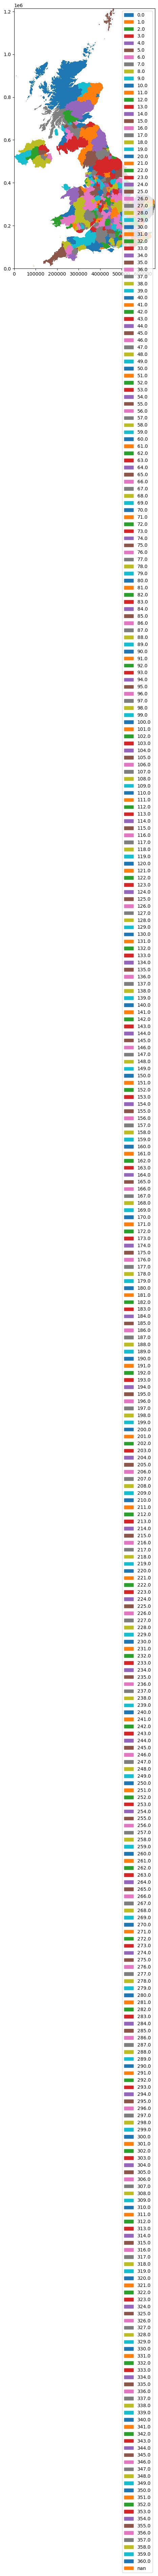

In [5]:
f, ax = plt.subplots(figsize=(10, 10))
ds["LAD25NM"].land.plot(ax=ax)

In [6]:
ds.to_netcdf("../data/ONS_LAD_MAY_2025_UK_BUC_1000.nc")